In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Google Trends provides an API that can be used to analyze the daily searches on Google known as 'pytrends'

In [ ]:
pip install pytrends

In [2]:
from pytrends.request import TrendReq
trends = TrendReq()

In [3]:
d0 = trends.trending_searches()
d0.head(10)

,0
0,Mike White
1,Eternals
2,Pete Davidson
3,Dave Portnoy
4,OSHA
5,Alex Tuch
6,Robert Sarver
7,Forza Horizon 5
8,Vanguard release date
9,Joe Budden


In [4]:
d1=trends.today_searches()
d1.head(10)

0               Mike White
1                 Eternals
2            Pete Davidson
3             Dave Portnoy
4                     OSHA
5                Alex Tuch
6            Robert Sarver
7          Forza Horizon 5
8    Vanguard release date
9               Joe Budden
Name: query, dtype: object

In [5]:
# building payload
# kw_list gets the keyword to get data for

trends.build_payload(kw_list=["Machine Learning", "Scope"], timeframe='2021-01-01 2021-10-30')


In [6]:
d2 = trends.interest_by_region()
d2 = d2.sort_values(by="Machine Learning", ascending=False)
d2=d2.head(10)
d2

,Machine Learning,Scope
geoName,,
Colombia,68,32
Iran,62,38
South Korea,59,41
Argentina,58,42
Brazil,56,44
China,56,44
Israel,56,44
Egypt,56,44
Greece,55,45


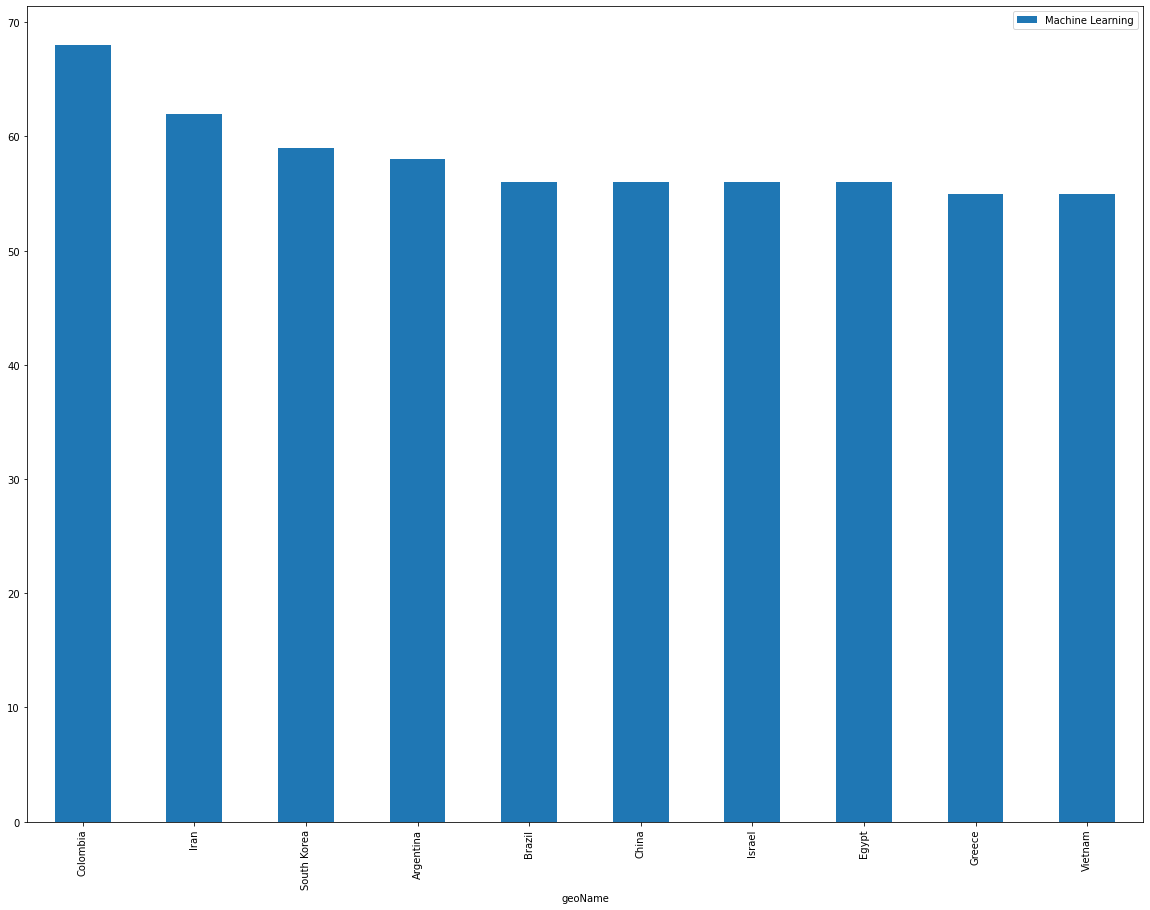

In [7]:
d2.reset_index().plot(x="geoName", y="Machine Learning", figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

interest_over_time() shows the search interest for a given keyword.

A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [8]:
d3 = trends.interest_over_time()
d3 = d3.sort_values(by="Machine Learning", ascending=False)
d3 = d3.drop(labels=['isPartial'],axis='columns')
d3.head(10)

,Machine Learning,Scope
date,,
2021-05-30,39,79
2021-10-24,39,97
2021-10-17,38,100
2021-10-03,38,93
2021-04-18,38,82
2021-09-26,38,92
2021-09-19,37,96
2021-03-21,37,93
2021-09-12,37,89


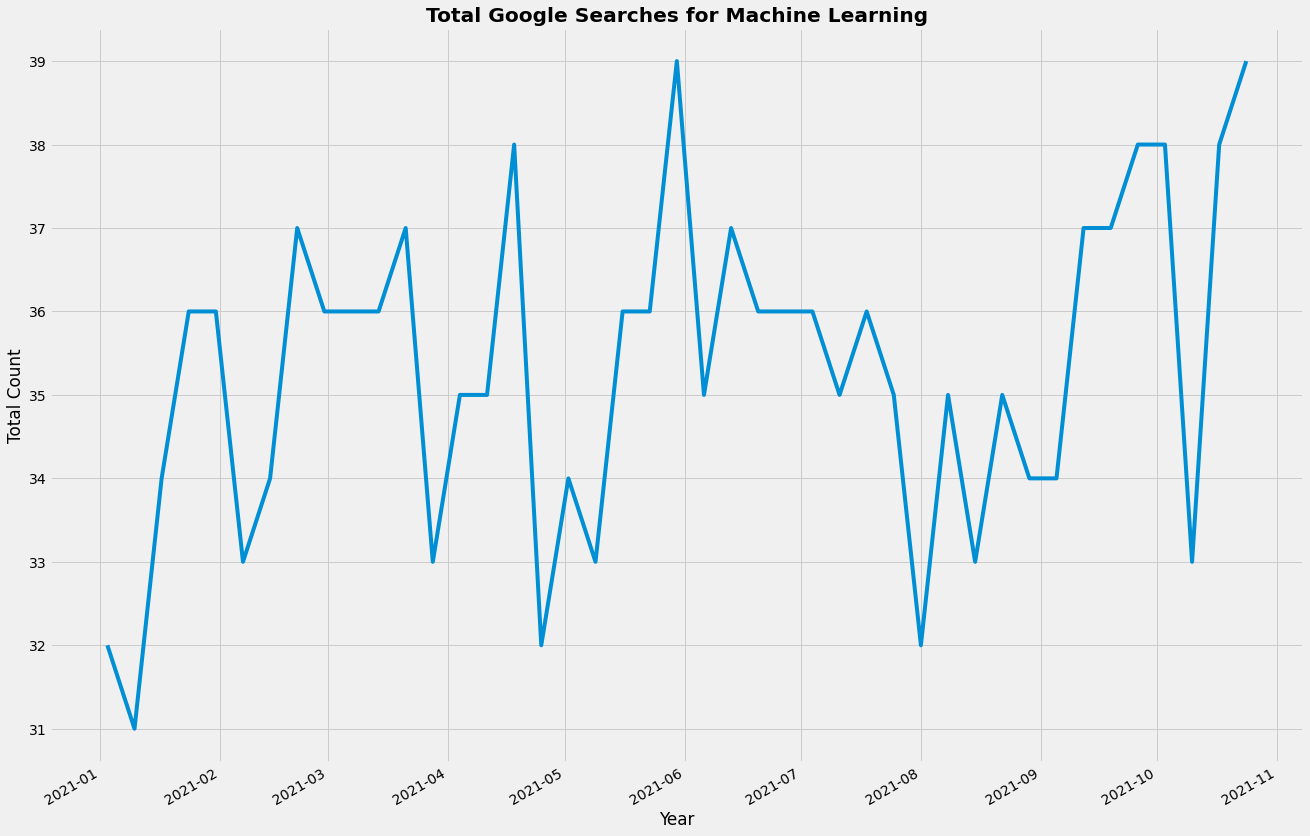

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
d3['Machine Learning'].plot()
plt.title('Total Google Searches for Machine Learning', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

In [10]:
d4 = trends.related_queries()
d4

{'Machine Learning': {'top':                                        query  value
  0                      machine learning data    100
  1                   what is machine learning     70
  2                                     python     69
  3                    machine learning python     67
  4                        machine learning ai     50
  5                                         ai     48
  6                              deep learning     43
  7             machine learning deep learning     40
  8                     machine learning model     38
  9                    artificial intelligence     30
  10  artificial intelligence machine learning     29
  11             data science machine learning     29
  12                   machine learning course     28
  13                   google machine learning     28
  14           machine learning classification     27
  15               machine learning algorithms     27
  16                machine learning algorithm     26
 

In [11]:
d5 = trends.suggestions('Machine Learning')
d5

[{'mid': '/m/01hyh_', 'title': 'Machine learning', 'type': 'Field of study'},
 {'mid': '/g/11f2sl5v8_',
  'title': 'Automated machine learning',
  'type': 'Topic'},
 {'mid': '/m/04q9r7w', 'title': 'Online machine learning', 'type': 'Topic'},
 {'mid': '/g/11b8_2swyn',
  'title': 'TryCatch Classes | Data Science & Analytics, Mobile App Development, Web Design & Development, UI UX, Flutter, Android, IOS, Python Machine Learning Training, Cyber Security, Digital Marketing Course in Mumbai',
  'type': 'Software training institute in Mumbai, India'}]

In [12]:
d6 = trends.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL')
d6.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
